# **Visão geral**

This notebook uses an UCI dataset:
https://archive-beta.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success

## Introduction Paper

Early prediction of student's performance in higher education: a case study
Mónica V. Martins, Daniel Tolledo, Jorge Machado, Luís M. T. Baptista, and Valentim Realinho Trends and Applications in Information Systems and Technologies


Other datasets evaluated:

https://archive.ics.uci.edu/ml/datasets/Student+Performance

https://archive.ics.uci.edu/ml/datasets/Higher+Education+Students+Performance+Evaluation+Dataset



# Obtenção dos dados

In [1]:
from io import BytesIO
from zipfile import ZipFile
import requests

url = 'https://archive-beta.ics.uci.edu/static/public/697/predict+students+dropout+and+academic+success.zip'
dataset_file = 'data.csv'
filename = requests.get(url).content
zip_file = ZipFile( BytesIO(filename), 'r' )

In [2]:
import pandas as pd

df = pd.read_csv(zip_file.open(dataset_file),sep=';')
df.head(5)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


# Entendimento dos dados

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

## Total de instances e features

In [4]:
df.shape

(4424, 37)

## Classes

In [5]:
df['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

## Features, missing values e data types

In [6]:
df.dtypes.value_counts()

int64      29
float64     7
object      1
dtype: int64

## Caraterísticas estatísticas

In [7]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [8]:
int_features = df.select_dtypes(['int64']).columns.to_numpy()
float_features = df.select_dtypes(['float64']).columns.to_numpy()
print(int_features)
print(float_features)

['Marital status' 'Application mode' 'Application order' 'Course'
 'Daytime/evening attendance\t' 'Previous qualification' 'Nacionality'
 "Mother's qualification" "Father's qualification" "Mother's occupation"
 "Father's occupation" 'Displaced' 'Educational special needs' 'Debtor'
 'Tuition fees up to date' 'Gender' 'Scholarship holder'
 'Age at enrollment' 'International' 'Curricular units 1st sem (credited)'
 'Curricular units 1st sem (enrolled)'
 'Curricular units 1st sem (evaluations)'
 'Curricular units 1st sem (approved)'
 'Curricular units 1st sem (without evaluations)'
 'Curricular units 2nd sem (credited)'
 'Curricular units 2nd sem (enrolled)'
 'Curricular units 2nd sem (evaluations)'
 'Curricular units 2nd sem (approved)'
 'Curricular units 2nd sem (without evaluations)']
['Previous qualification (grade)' 'Admission grade'
 'Curricular units 1st sem (grade)' 'Curricular units 2nd sem (grade)'
 'Unemployment rate' 'Inflation rate' 'GDP']


# Exploração de dados

In [9]:
import plotly.express as px

fig = px.histogram(df, x='Target')
fig.show()

In [10]:
# for column in int_features:
#   fig = px.scatter(df, x=column, color='Target')
#   fig.show()

In [11]:
# for column in float_features:
#   fig = px.histogram(df, x=column, color='Target')
#   fig.show()

# Preparação de dados

In [12]:
df_target = df['Target']
df_features = df.drop(columns='Target')
df_target

0        Dropout
1       Graduate
2        Dropout
3       Graduate
4       Graduate
          ...   
4419    Graduate
4420     Dropout
4421     Dropout
4422    Graduate
4423    Graduate
Name: Target, Length: 4424, dtype: object

## Codificação de classes para valores numéricos

In [13]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
target = encoder.fit_transform(df_target)
target

array([0, 2, 0, ..., 0, 2, 2])

## Normalização das features

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(df_features)
data

array([[-0.29482875, -0.09547022,  2.49089589, ..., -0.28763846,
         0.12438647,  0.76576084],
       [-0.29482875, -0.20986898, -0.55406775, ...,  0.87622207,
        -1.10522155,  0.34719942],
       [-0.29482875, -1.01066035,  2.49089589, ..., -0.28763846,
         0.12438647,  0.76576084],
       ...,
       [-0.29482875, -1.01066035, -0.55406775, ...,  0.87622207,
        -1.10522155,  0.34719942],
       [-0.29482875, -1.01066035, -0.55406775, ..., -0.81325289,
        -1.46687097, -1.37551124],
       [-0.29482875, -0.4958659 , -0.55406775, ...,  0.42569541,
         1.7879738 , -0.74987207]])

## Definição de função para exibição da ConfusionMatrix

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay

np.set_printoptions(precision=2)

class_names = df_target.unique()
color_map = plt.cm.Blues
options = [
    ("Confusion matrix, denormalized", None),
    ("Confusion matrix, normalized", "true"),
]

def confusion_matrix_display(y_test, y_pred, options, method, display_labels, color_map):  
  for title, normalize in options:
    disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=class_names,normalize=normalize,cmap=color_map)
    disp.ax_.set_title(method+' -  '+title)
  plt.show()


## Definição de função para coleta de métricas

In [16]:
metrics_df = pd.DataFrame()

In [17]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix

def metrics_collect(method, y_test, y_pred):
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred,average='weighted')
  recall = recall_score(y_test, y_pred,average='weighted')
  f1 = f1_score(y_test, y_pred,average='weighted')
  confusion_matrix_data = confusion_matrix(y_test, y_pred, normalize='true')  
  metrics_data = {'method': method, 
                  'accuracy': accuracy, 
                  'precision': precision, 
                  'recall': recall, 
                  'f1': f1, 
                  'confusion_matrix': confusion_matrix_data }
  return metrics_data

## Definição de parâmetros para o GridSearchCV

In [18]:
from sklearn.model_selection import GridSearchCV

scoring='accuracy'
cv=10
n_jobs=-1

# Modelagem

## Separação dados de treinamento e testes

In [19]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3318, 36)
(3318,)
(1106, 36)
(1106,)


## Aplicação do método KNN

In [20]:
from sklearn.neighbors import KNeighborsClassifier

parameters = {'n_neighbors': range(1,9)}
clf = GridSearchCV(KNeighborsClassifier(), parameters, scoring=scoring, cv=cv, n_jobs=n_jobs)
clf.fit(X_train,y_train)
print(clf.best_params_)

{'n_neighbors': 7}


In [21]:
method = 'KNN'
knn = KNeighborsClassifier(**clf.best_params_)
y_pred_knn = knn.fit(X_train,y_train).predict(X_test)
metrics = metrics_collect(method, y_test, y_pred_knn)
metrics_df = metrics_df.append(metrics, ignore_index=True)

<ipython-input-21-059de96c0e67>:5: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [22]:
knn.get_params(deep=True)

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 7,
 'p': 2,
 'weights': 'uniform'}

## Aplicação do método LDA

In [23]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

method = 'LDA'
lda = LinearDiscriminantAnalysis()
y_pred_lda = lda.fit(X_train,y_train).predict(X_test)
metrics = metrics_collect(method, y_test, y_pred_lda)
metrics_df = metrics_df.append(metrics, ignore_index=True)

<ipython-input-23-a353e968a87b>:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [24]:
lda.get_params(deep=True)

{'covariance_estimator': None,
 'n_components': None,
 'priors': None,
 'shrinkage': None,
 'solver': 'svd',
 'store_covariance': False,
 'tol': 0.0001}

## Aplicação do método QDA

In [25]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

method = 'QDA'
qda = QuadraticDiscriminantAnalysis()
y_pred_qda = qda.fit(X_train,y_train).predict(X_test)
metrics = metrics_collect(method, y_test, y_pred_qda)
metrics_df = metrics_df.append(metrics, ignore_index=True)

<ipython-input-25-02f0d8b16f53>:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [26]:
qda.get_params(deep=True)

{'priors': None, 'reg_param': 0.0, 'store_covariance': False, 'tol': 0.0001}

## Aplicação do método SVC

In [27]:
from sklearn.svm import SVC

parameters = { 'kernel': ('linear', 'rbf'), 'C': [1,10], 'gamma': ('scale', 'auto') }
clf = GridSearchCV(SVC(), parameters, scoring=scoring, cv=cv, n_jobs=n_jobs)
clf.fit(X_train,y_train)
print(clf.best_params_)

{'C': 10, 'gamma': 'scale', 'kernel': 'linear'}


In [28]:
method = 'SVC'
svc = SVC(**clf.best_params_)
y_pred_svc = svc.fit(X_train,y_train).predict(X_test)
metrics = metrics_collect(method, y_test, y_pred_svc)
metrics_df = metrics_df.append(metrics, ignore_index=True)

<ipython-input-28-ee01c5c81c75>:5: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [29]:
svc.get_params(deep=True)

{'C': 10,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

## Aplicação do método MLP

In [30]:
from sklearn.neural_network import MLPClassifier

# restrição de parâmetros devido a desempenho...
parameters = {'solver': ['lbfgs'], 'alpha': [0.0001, 0.0001], 'hidden_layer_sizes': [10,20], 'max_iter': [1000,1500]}
clf = GridSearchCV(MLPClassifier(), parameters, scoring=scoring, cv=cv, n_jobs=n_jobs)
clf.fit(X_train,y_train)
print(clf.best_params_)

{'alpha': 0.0001, 'hidden_layer_sizes': 10, 'max_iter': 1500, 'solver': 'lbfgs'}


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



In [31]:
method = 'MLP'
mlp = MLPClassifier(**clf.best_params_)
y_pred_mlp = mlp.fit(X_train,y_train).predict(X_test)
metrics = metrics_collect(method, y_test, y_pred_mlp)
metrics_df = metrics_df.append(metrics, ignore_index=True)

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

<ipython-input-31-c0265671646d>:5: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [32]:
mlp.get_params(deep=True)

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': 10,
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 1500,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

## Aplicação do método RFT

In [33]:
from sklearn.ensemble import RandomForestClassifier

parameters = {'n_estimators': [200, 300], 'max_features': ['sqrt', 'log2'], 'max_depth': [None, 10] }
clf = GridSearchCV(RandomForestClassifier(), parameters, scoring=scoring, cv=cv, n_jobs=n_jobs)
clf.fit(X_train,y_train)
print(clf.best_params_)

{'max_depth': None, 'max_features': 'log2', 'n_estimators': 200}


In [34]:
method = 'RFT'
rft = RandomForestClassifier(**clf.best_params_)
y_pred_rft = rft.fit(X_train,y_train).predict(X_test)
metrics = metrics_collect(method, y_test, y_pred_rft)
metrics_df = metrics_df.append(metrics, ignore_index=True)

<ipython-input-34-ae2a24b5ad24>:5: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [35]:
rft.get_params(deep=True)

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'log2',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

# Avaliações

## Métricas diversas

In [36]:
import plotly.express as px

fig = px.bar(metrics_df, x='method', y=['accuracy', 'precision','recall', 'f1'], barmode='group', text_auto='.2f', title='Metrics by method')
fig.show()

## Matriz de Confusão

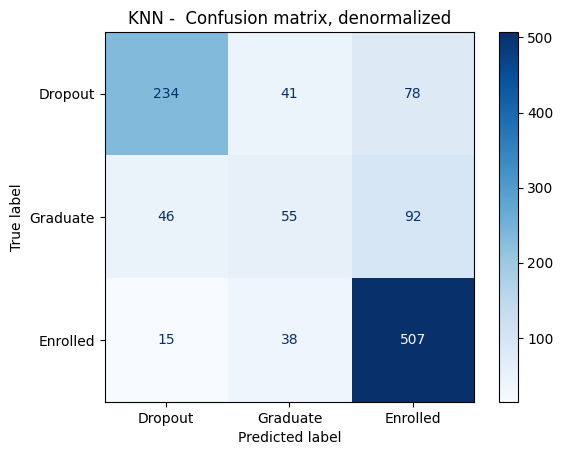

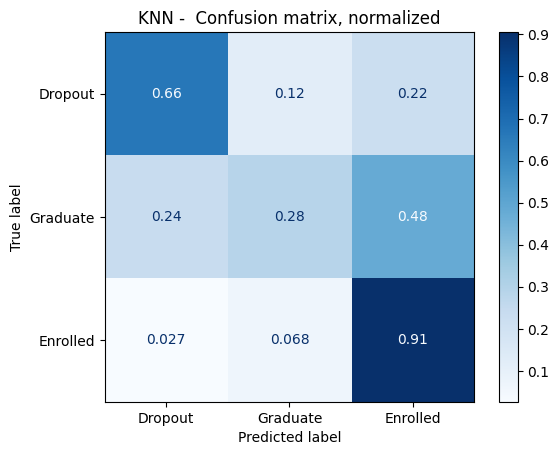

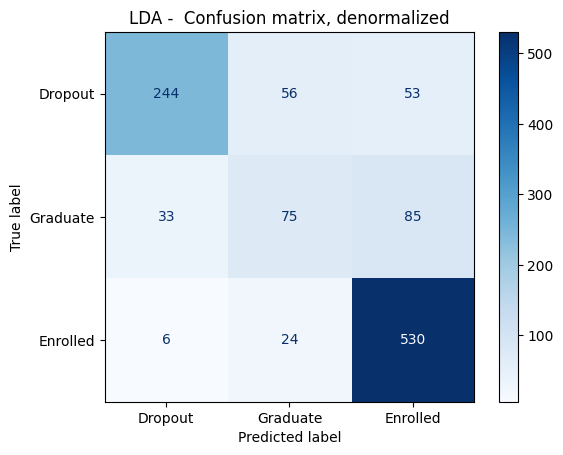

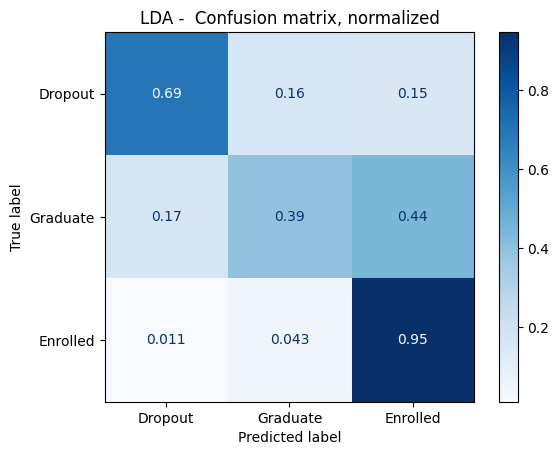

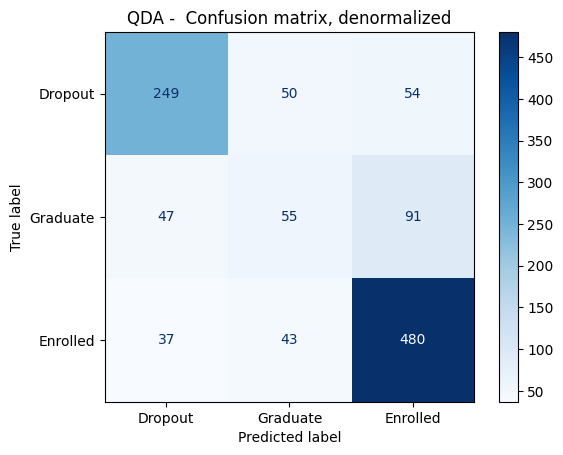

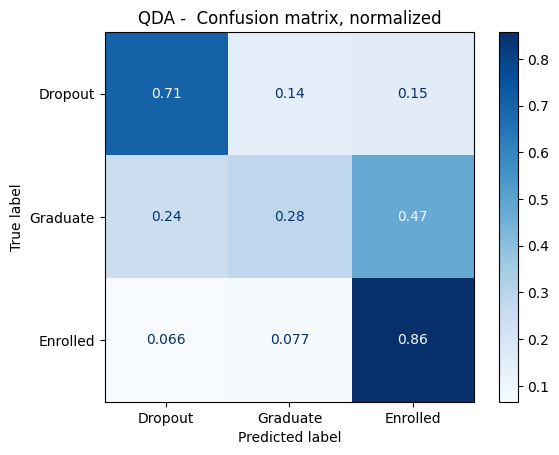

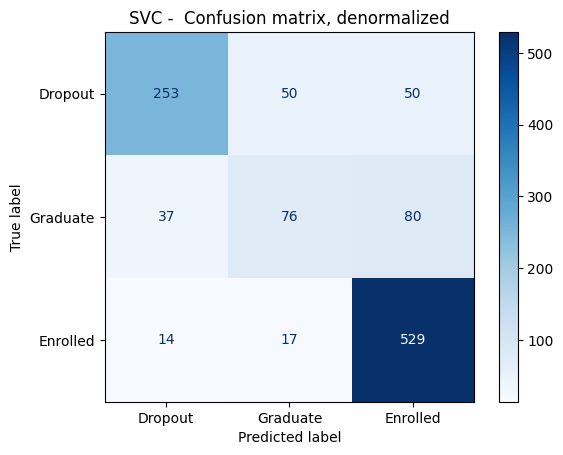

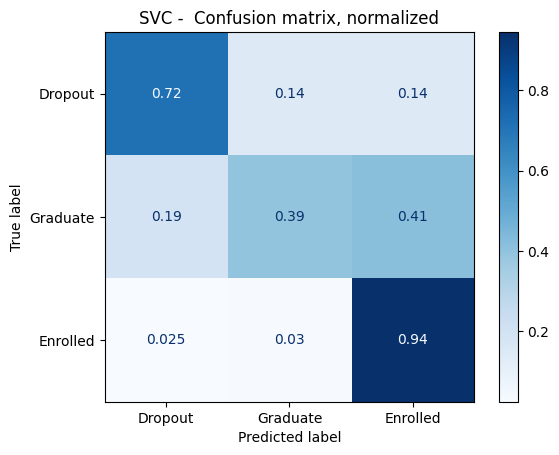

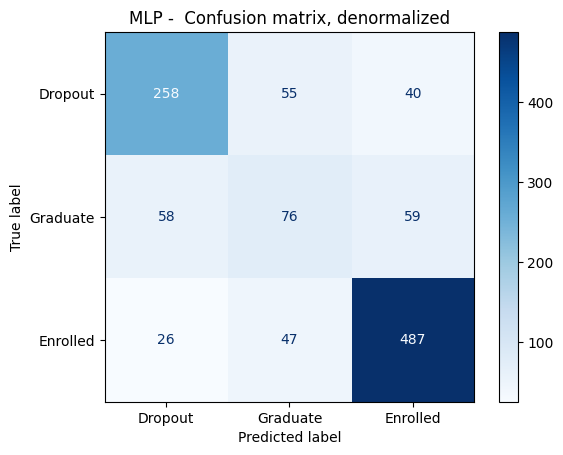

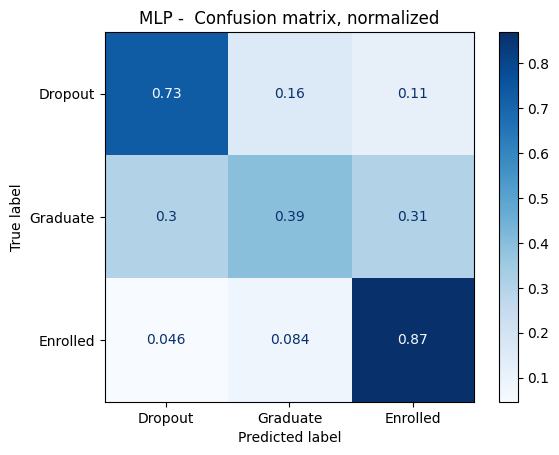

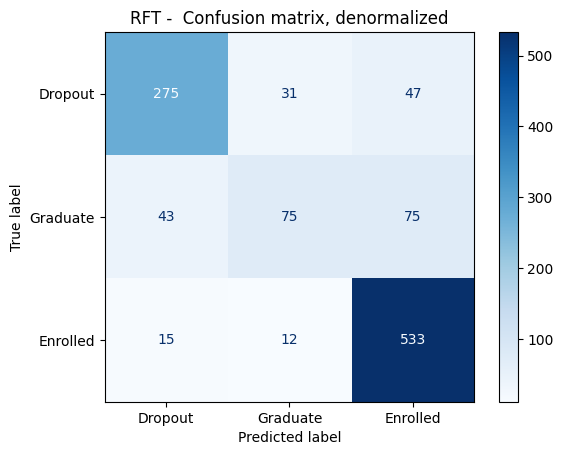

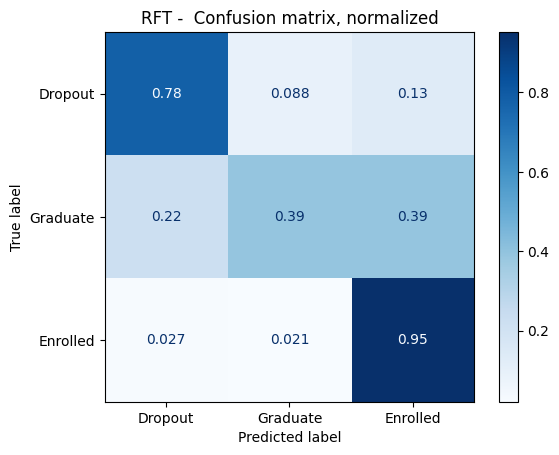

In [37]:
import matplotlib.pyplot as plt

methods = [ ['KNN',  y_pred_knn ],
            ['LDA',  y_pred_lda ],
            ['QDA',  y_pred_qda ],
            ['SVC',  y_pred_svc ],
            ['MLP',  y_pred_mlp ],
            ['RFT',  y_pred_rft ] ]
for method, y_pred in methods:
  confusion_matrix_display(y_test, y_pred, options, method, class_names, color_map)